# Evaluating Logistic Regression Models - Lab

## Introduction

 In regression, you are predicting values so it made sense to discuss error as a distance of how far off our estimates were. In classifying a binary variable however, a model is either correct or incorrect. As a result, we tend to deconstruct this as how many false positives versus false negatives we come across.  
In particular, we examine a few different specific measurements when evaluating the performance of a classification algorithm. In this review lab, we'll review precision, recall, accuracy, and F1-score in order to evaluate our logistic regression models.


## Objectives
You will be able to:  
* Understand and assess precision, recall, and accuracy of classifiers
* Evaluate classification models using various metrics

## Terminology Review  

Let's take a moment and review some classification evaluation metrics:  


$Precision = \frac{\text{Number of True Positives}}{\text{Number of Predicted Positives}}$    
  

$Recall = \frac{\text{Number of True Positives}}{\text{Number of Actual Total Positives}}$  
  
$Accuracy = \frac{\text{Number of True Positives + True Negatives}}{\text{Total Observations}}$

$\text{F1-Score} = 2\ \frac{Precision\ x\ Recall}{Precision + Recall}$


At times, it may be superior to tune a classification algorithm to optimize against precision or recall rather than overall accuracy. For example, imagine the scenario of predicting whether or not a patient is at risk for cancer and should be brought in for additional testing. In cases such as this, we often may want to cast a slightly wider net, and it is much preferable to optimize for recall, the number of cancer positive cases, then it is to optimize precision, the percentage of our predicted cancer-risk patients who are indeed positive.

## 1. Split the data into train and test sets

In [7]:
import pandas as pd
df = pd.read_csv('heart.csv')
y = df.target
X = df[df.columns.difference(['target'])]

In [8]:
#Your code here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

## 2. Create a standard logistic regression model

In [11]:
#Your code here
from sklearn.linear_model import LogisticRegression
regr = LogisticRegression(fit_intercept=False, C=1e12)

In [12]:
regr.fit(X_train,y_train)

/Users/dennistrimarchi/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

## 3. Write a function to calculate the precision

In [20]:
def precision(y_hat, y):
    true_pos = sum((y_hat==1) & (y==1))
    pred_pos = sum(y_hat==1)
    return true_pos/pred_pos
    #Your code here

## 4. Write a function to calculate the recall

In [22]:
def recall(y_hat, y):
    true_pos = sum((y_hat==1) & (y==1))
    act_pos = sum(y==1)
    return true_pos/act_pos
    #Your code here

## 5. Write a function to calculate the accuracy

In [23]:
def accuracy(y_hat, y):
    correct = sum((y_hat==1) & (y==1)) + sum((y_hat==0) & (y==0))
    return correct / len(y)
    #Your code here

## 6. Write a function to calculate the F1-score

In [17]:
def f1_score(y_hat,y):
    prec = precision(y_hat,y)
    rec = recall(y_hat,y)
    return 2*prec*rec / (prec+rec)
    #Your code here

## 7. Calculate the precision, recall, accuracy, and F1-score of your classifier.

Do this for both the training and the test set

In [18]:
#Your code here
y_hat_test = regr.predict(X_test)
y_hat_train = regr.predict(X_train)

In [25]:
print('Training Precision: ', precision(y_hat_train, y_train))
print('Testing Precision: ', precision(y_hat_test, y_test))
print('\n\n')

print('Training Recall: ', recall(y_hat_train, y_train))
print('Testing Recall: ', recall(y_hat_test, y_test))
print('\n\n')

print('Training Accuracy: ', accuracy(y_hat_train, y_train))
print('Testing Accuracy: ', accuracy(y_hat_test, y_test))
print('\n\n')

print('Training F1-Score: ',f1_score(y_hat_train,y_train))
print('Testing F1-Score: ',f1_score(y_hat_test,y_test))

Training Precision:  0.8333333333333334
Testing Precision:  0.8157894736842105



Training Recall:  0.916030534351145
Testing Recall:  0.9117647058823529



Training Accuracy:  0.8553719008264463
Testing Accuracy:  0.8360655737704918



Training F1-Score:  0.8727272727272728
Testing F1-Score:  0.861111111111111


Great Job! Now it's time to check your work with sklearn. 

## 8. Calculating Metrics with sklearn

Each of the metrics we calculated above is also available inside the `sklearn.metrics` module.  

In the cell below, import the following functions:

* `precision_score`
* `recall_score`
* `accuracy_score`
* `f1_score`

Compare the results of your performance metrics functions with the sklearn functions above. Calculate these values for both your train and test set.

In [30]:
#Your code here
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report

print('Training Precision: ', precision_score(y_hat_train, y_train))
print('Testing Precision: ', precision_score(y_hat_test, y_test))
print('\n\n')

print('Training Recall: ', recall_score(y_hat_train, y_train))
print('Testing Recall: ', recall_score(y_hat_test, y_test))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_hat_train, y_train))
print('Testing Accuracy: ', accuracy_score(y_hat_test, y_test))
print('\n\n')

print('Training F1-Score: ',f1_score(y_hat_train,y_train))
print('Testing F1-Score: ',f1_score(y_hat_test,y_test))
print('\n\n')

print(classification_report(y_train, y_hat_train))
print('\n\n')

print(classification_report(y_test, y_hat_test))

Training Precision:  0.916030534351145
Testing Precision:  0.9117647058823529



Training Recall:  0.8333333333333334
Testing Recall:  0.8157894736842105



Training Accuracy:  0.8553719008264463
Testing Accuracy:  0.8360655737704918



Training F1-Score:  0.8727272727272728
Testing F1-Score:  0.861111111111111



              precision    recall  f1-score   support

           0       0.89      0.78      0.83       111
           1       0.83      0.92      0.87       131

   micro avg       0.86      0.86      0.86       242
   macro avg       0.86      0.85      0.85       242
weighted avg       0.86      0.86      0.85       242




              precision    recall  f1-score   support

           0       0.87      0.74      0.80        27
           1       0.82      0.91      0.86        34

   micro avg       0.84      0.84      0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.83        61



## 9. Comparing Precision, Recall, Accuracy, and F1-Score of Test vs Train Sets


Calculate and then plot the precision, recall, accuracy, and F1-score for the test and train splits using different train set sizes. What do you notice?

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
training_Precision = []
testing_Precision = []
training_Recall = []
testing_Recall = []
training_Accuracy = []
testing_Accuracy = []
training_F1 = []
testing_F1 = []

for i in range(10,95):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= i/100); #replace the "None" here
    logreg = LogisticRegression(fit_intercept = False, C = 1e12);
    model_log = regr.fit(X_train, y_train);
    y_hat_test = regr.predict(X_test);
    y_hat_train = regr.predict(X_train);

    # 6 lines of code here
    training_Precision.append(precision(y_hat_train, y_train));
    testing_Precision.append(precision(y_hat_test, y_test));
    training_Recall.append(recall(y_hat_train, y_train));
    testing_Recall.append(recall(y_hat_test, y_test));
    training_Accuracy.append(accuracy(y_hat_train, y_train));
    testing_Accuracy.append(accuracy(y_hat_test, y_test));
    training_F1.append(f1_score(y_hat_train,y_train));
    testing_F1.append(f1_score(y_hat_test,y_test));

/Users/dennistrimarchi/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/dennistrimarchi/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/dennistrimarchi/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/dennistrimarchi/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/dennistrimarchi/anaconda3/envs/learn-

/Users/dennistrimarchi/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/dennistrimarchi/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/dennistrimarchi/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/dennistrimarchi/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/dennistrimarchi/anaconda3/envs/learn-

Create 4 scatter plots looking at the test and train precision in the first one, test and train recall in the second one, testing and training accuracy in the third one, and testing and training f1-score in the fourth one.

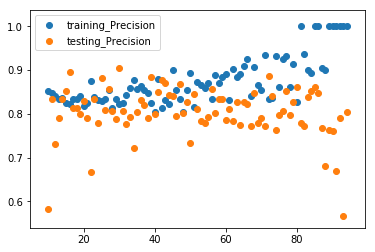

In [39]:
# code for test and train precision
plt.scatter(list(range(10,95)), training_Precision, label = 'training_Precision')
plt.scatter(list(range(10,95)), testing_Precision, label = 'testing_Precision')
plt.legend()

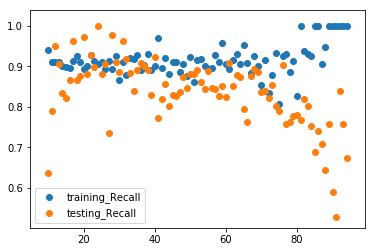

In [40]:
# code for test and train recall
plt.scatter(list(range(10,95)), training_Recall, label = 'training_Recall')
plt.scatter(list(range(10,95)), testing_Recall, label = 'testing_Recall')
plt.legend()

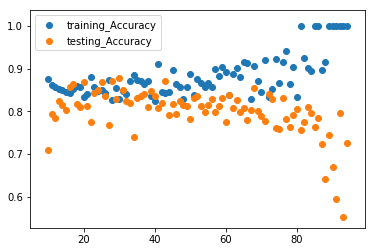

In [41]:
# code for test and train accuracy
plt.scatter(list(range(10,95)), training_Accuracy, label = 'training_Accuracy')
plt.scatter(list(range(10,95)), testing_Accuracy, label = 'testing_Accuracy')
plt.legend()

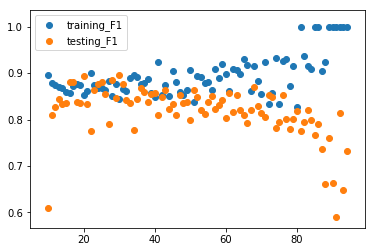

In [42]:
# code for test and train F1-score
plt.scatter(list(range(10,95)), training_F1, label = 'training_F1')
plt.scatter(list(range(10,95)), testing_F1, label = 'testing_F1')
plt.legend()

## Summary

Nice! In this lab, you gained some extra practice with evaluation metrics for classification algorithms. You also got some further python practice by manually coding these functions yourself, giving you a deeper understanding of how they work. Going forward, continue to think about scenarios in which you might prefer to optimize one of these metrics over another.